## Summary

In [6]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,332,1329599592615317512,#30DayMapChallenge 2020 Día 19 Nulos: Porcenta...,es,2020-11-20 01:37:00,1,5,"[{'text': '30DayMapChallenge', 'indices': [0, ...",7630312,Yúum-K'aak-Náab,jdeltoro1973,Guadalajara México,537,1997,http://pbs.twimg.com/media/EnOvunYXcAAYUGb.jpg,https://t.co/FAXbHVCYpd
5704,334,1329596340859326464,#30DayMapChallenge https://t.co/Vl8oT1pb2T,und,2020-11-20 01:24:05,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",2617594364,rick debbout,raisingDingus,NaN,12,126,http://pbs.twimg.com/media/EnOsvZ7VcAUerJj.jpg,https://t.co/Vl8oT1pb2T
5705,335,1329594777835278338,Día 19: Null (Nulo - sin datos) #30DayMapChall...,es,2020-11-20 01:17:52,2,2,"[{'text': '30DayMapChallenge', 'indices': [32,...",72170599,Mario Hernández,armiok,Ecatepec de Morelos,561,147,http://pbs.twimg.com/ext_tw_video_thumb/132959...,https://t.co/dV1e3MlvP3
5706,336,1329582732595195904,#30DayMapChallenge\nDía 19. NULL. Aquí no vive...,es,2020-11-20 00:30:00,6,15,"[{'text': '30DayMapChallenge', 'indices': [0, ...",2239825712,IIEG Jalisco,IIEGJ,"Calzada de los Pirules #71, Ciudad Granja, Zap...",4769,0,http://pbs.twimg.com/media/EnN8cHgW4AIK9PO.jpg,https://t.co/5lqlBjAKyh


In [8]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [9]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url,date
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh,2020-11-01
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e,2020-11-01
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ,2020-11-01
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ,2020-11-01
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,332,1329599592615317512,#30DayMapChallenge 2020 Día 19 Nulos: Porcenta...,es,2020-11-20 01:37:00,1,5,"[{'text': '30DayMapChallenge', 'indices': [0, ...",7630312,Yúum-K'aak-Náab,jdeltoro1973,Guadalajara México,537,1997,http://pbs.twimg.com/media/EnOvunYXcAAYUGb.jpg,https://t.co/FAXbHVCYpd,2020-11-20
5704,334,1329596340859326464,#30DayMapChallenge https://t.co/Vl8oT1pb2T,und,2020-11-20 01:24:05,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",2617594364,rick debbout,raisingDingus,NaN,12,126,http://pbs.twimg.com/media/EnOsvZ7VcAUerJj.jpg,https://t.co/Vl8oT1pb2T,2020-11-20
5705,335,1329594777835278338,Día 19: Null (Nulo - sin datos) #30DayMapChall...,es,2020-11-20 01:17:52,2,2,"[{'text': '30DayMapChallenge', 'indices': [32,...",72170599,Mario Hernández,armiok,Ecatepec de Morelos,561,147,http://pbs.twimg.com/ext_tw_video_thumb/132959...,https://t.co/dV1e3MlvP3,2020-11-20
5706,336,1329582732595195904,#30DayMapChallenge\nDía 19. NULL. Aquí no vive...,es,2020-11-20 00:30:00,6,15,"[{'text': '30DayMapChallenge', 'indices': [0, ...",2239825712,IIEG Jalisco,IIEGJ,"Calzada de los Pirules #71, Ciudad Granja, Zap...",4769,0,http://pbs.twimg.com/media/EnN8cHgW4AIK9PO.jpg,https://t.co/5lqlBjAKyh,2020-11-20


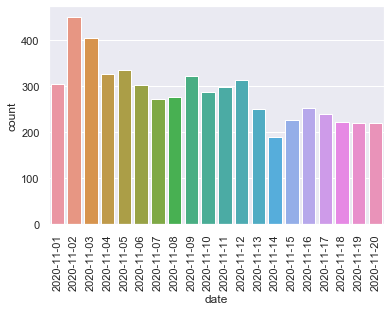

In [10]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)
plt.xticks(rotation=90)

plt.savefig("./graphs/maps_count.png", bbox_inches = 'tight')